<a href="https://colab.research.google.com/github/YuvarajCU/Loan-Default-Prediction-Using-Decision-Tree-Algorithm/blob/main/Loan_Default_Prediction_Using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction Using Decision Tree Algorithm

A loan default occurs when a borrower takes money from a bank and does not repay the loan. People often default on loans due to various reasons. Borrowers who default on loans not only damage their credit but also risk being sued and having their wages garnished.

**Business Objective: **

For a Lending company, it is very important to know whether a customer who availed a loan will pay back the loan or default on it. Thus before investing their money they rely on Predictive Analytics, to figure out which category of customers have a chance of defaulting on future loans. Based on these data driven strategies, these lending companies are able to make smarter decisions in lending money to the right kind of customers.

**Problem Statement:**

We have been assigned the task to build a Decision Tree Machine Learning model for an Online Lending firm “Lending Club”, that predicts the probability of a customer to Default on Loan.

## Downloading and importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style = "darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

In [ ]:
# To upload the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Hero Vired/Load Default Prediction/Dataset.csv')

## Data Preprocessing

In [ ]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6067,1,all_other,0.1183,331.34,10.762382,9.66,792,9990.041667,444,0.9,3,0,0,0
1995,1,debt_consolidation,0.1347,191.67,11.115429,6.18,672,4950.041667,5333,47.2,1,1,0,0
6479,1,debt_consolidation,0.0894,190.63,11.002100,2.86,757,4830.041667,7392,42.5,0,0,0,0
2150,1,debt_consolidation,0.1284,228.61,10.878047,11.59,707,2046.041667,7398,70.5,1,0,0,0
2016,1,debt_consolidation,0.1095,163.57,10.126631,12.48,732,3810.041667,3318,18.1,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
# Checking percentage of missing values
(df.isnull().mean()*100).sort_values(ascending = False)

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 9578
Columns: 14


In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

## Data Analysis

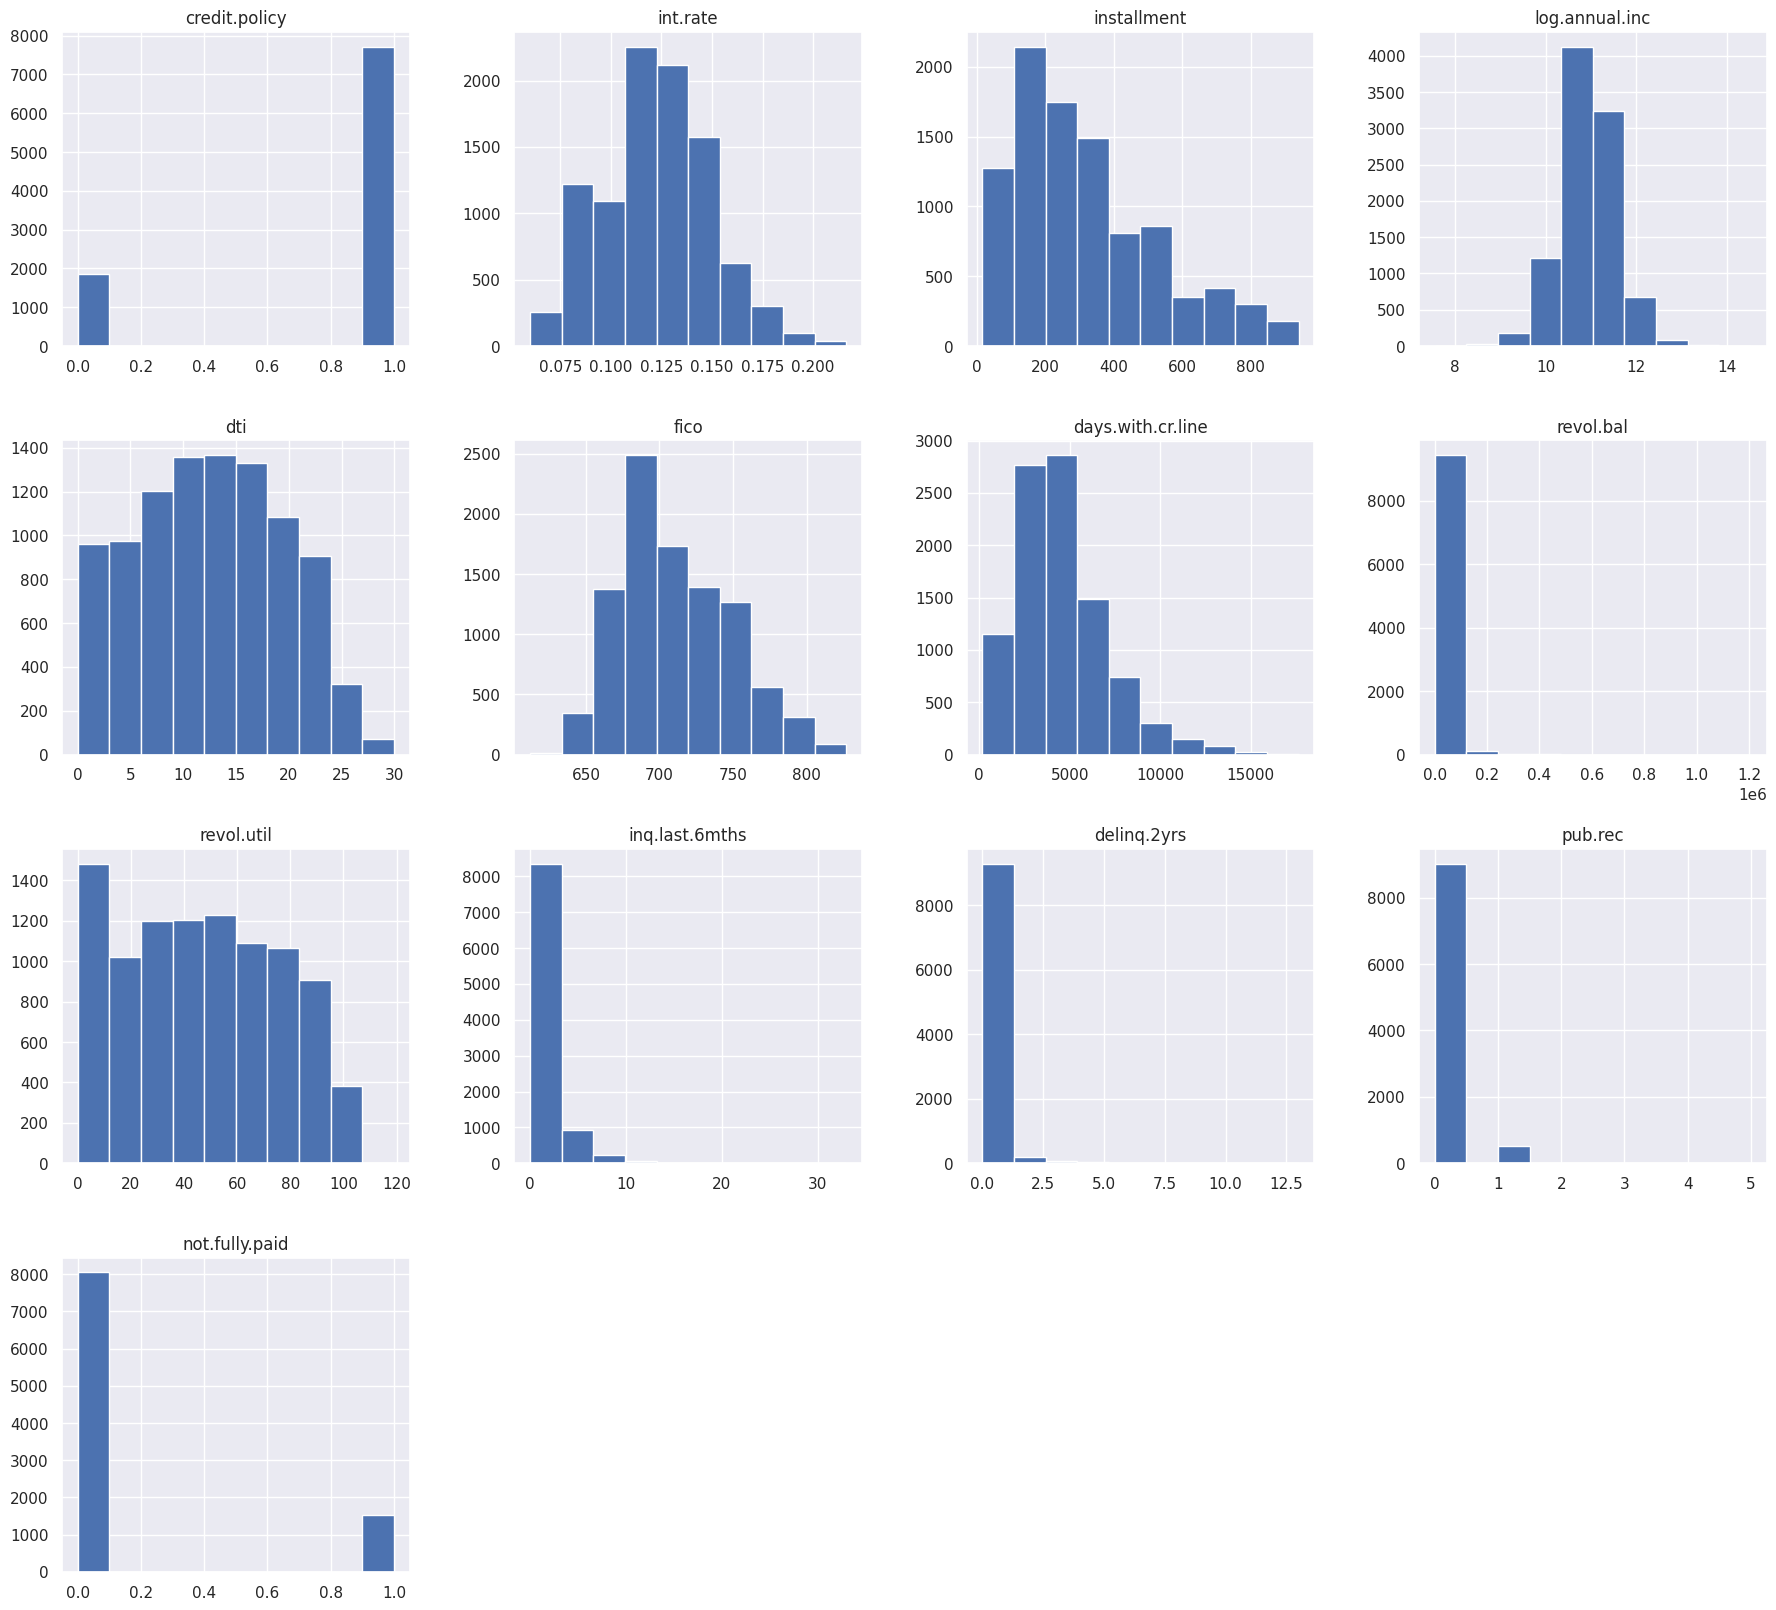

In [ ]:
df.hist( figsize = (22, 20) )
plt.show()

The data is Unbalanced and we will be using SMOTE to overcome this issue while building the model.

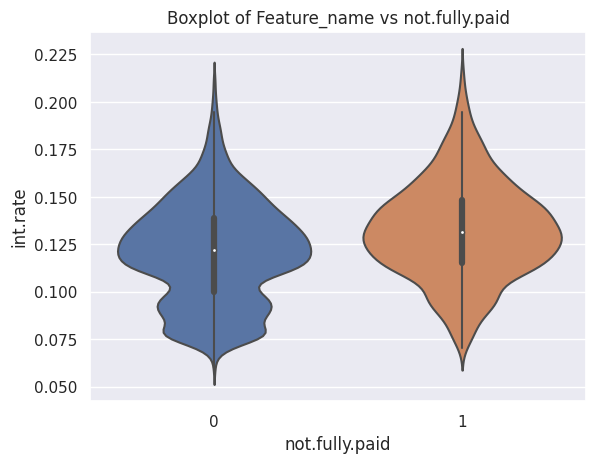

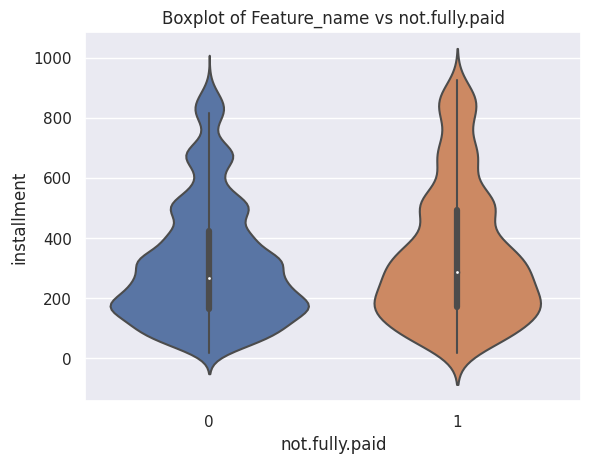

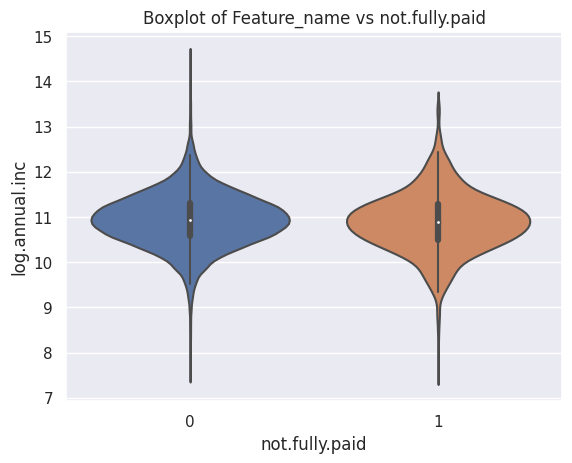

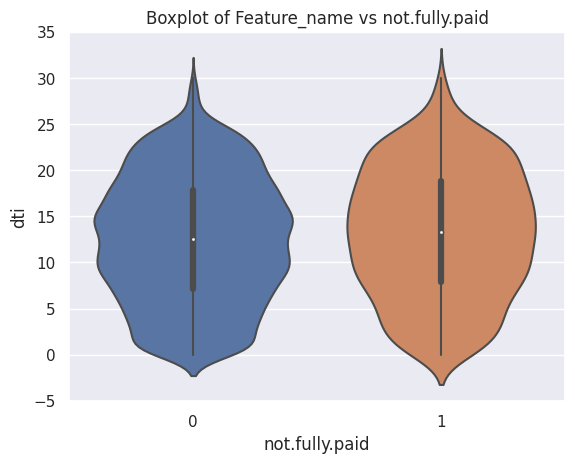

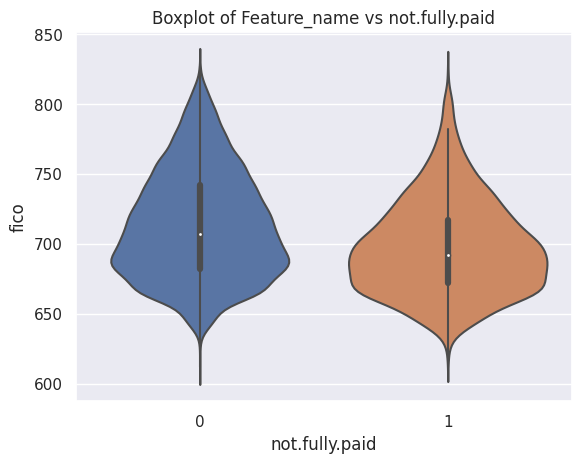

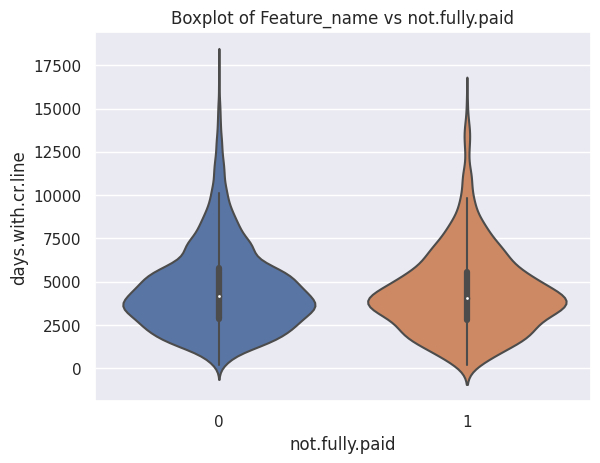

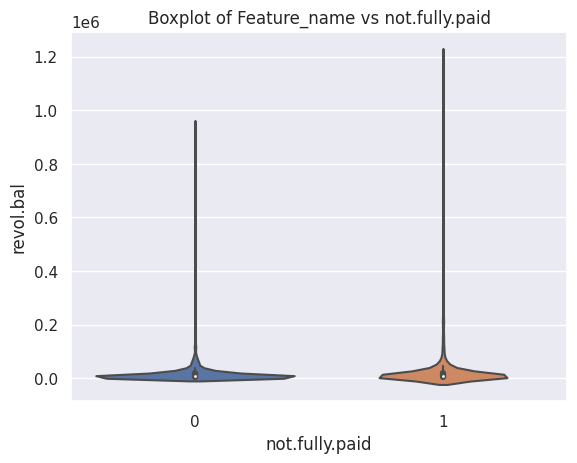

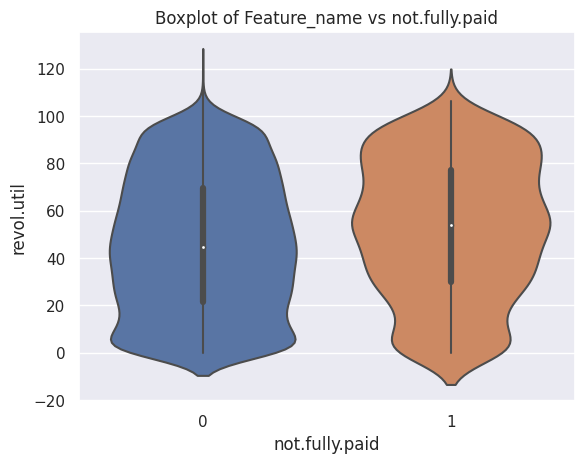

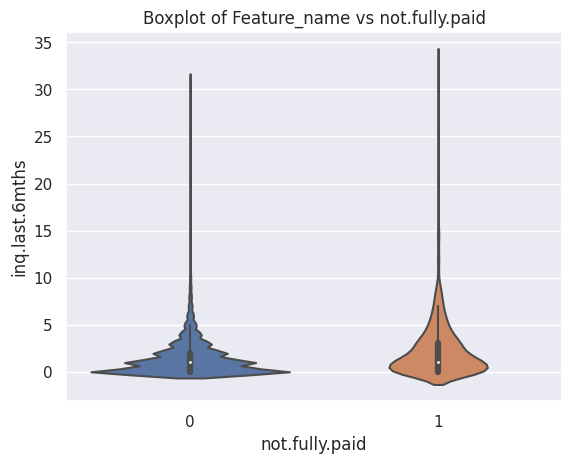

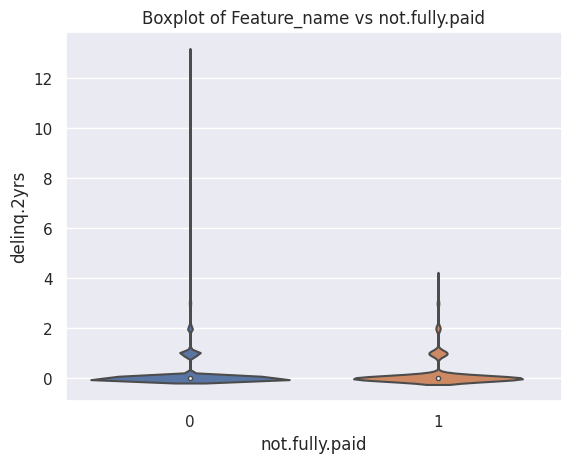

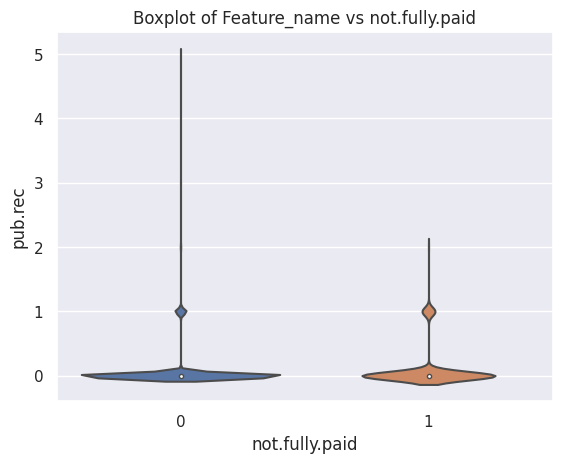

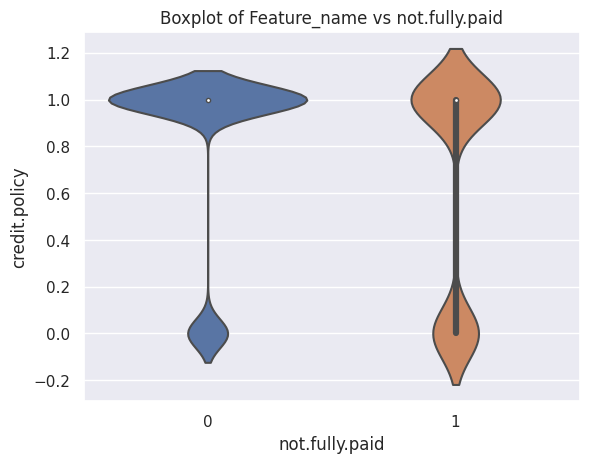

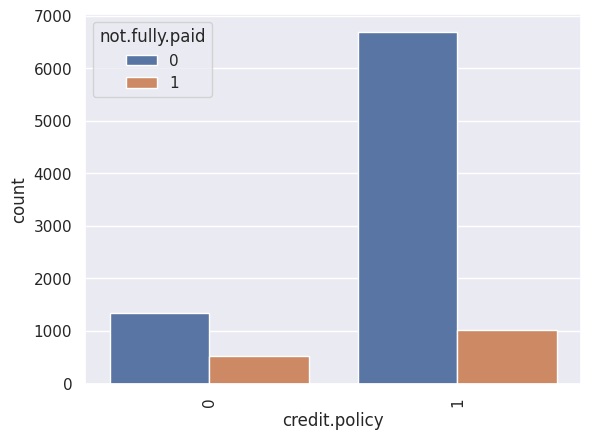

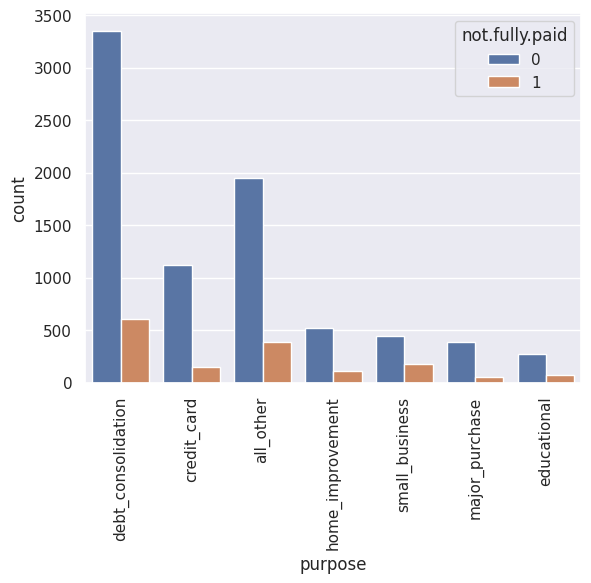

In [ ]:
# Define the independent and dependent variables
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Create histogram plots of all variables
num_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'credit.policy']
for col in num_cols:
    sns.violinplot(x='not.fully.paid', y=col, data=df)
    plt.xlabel('not.fully.paid')
    plt.ylabel(col)
    plt.title('Boxplot of Feature_name vs not.fully.paid')
    plt.show()

# Create bar plots of all categorical variables against the target variable
cat_cols = ['credit.policy', 'purpose']
for col in cat_cols:
    sns.countplot(x=col, hue='not.fully.paid', data=df)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation='vertical') # Set rotation for x-axis labels
    plt.show()

<ipython-input-44-1b3f5114264e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


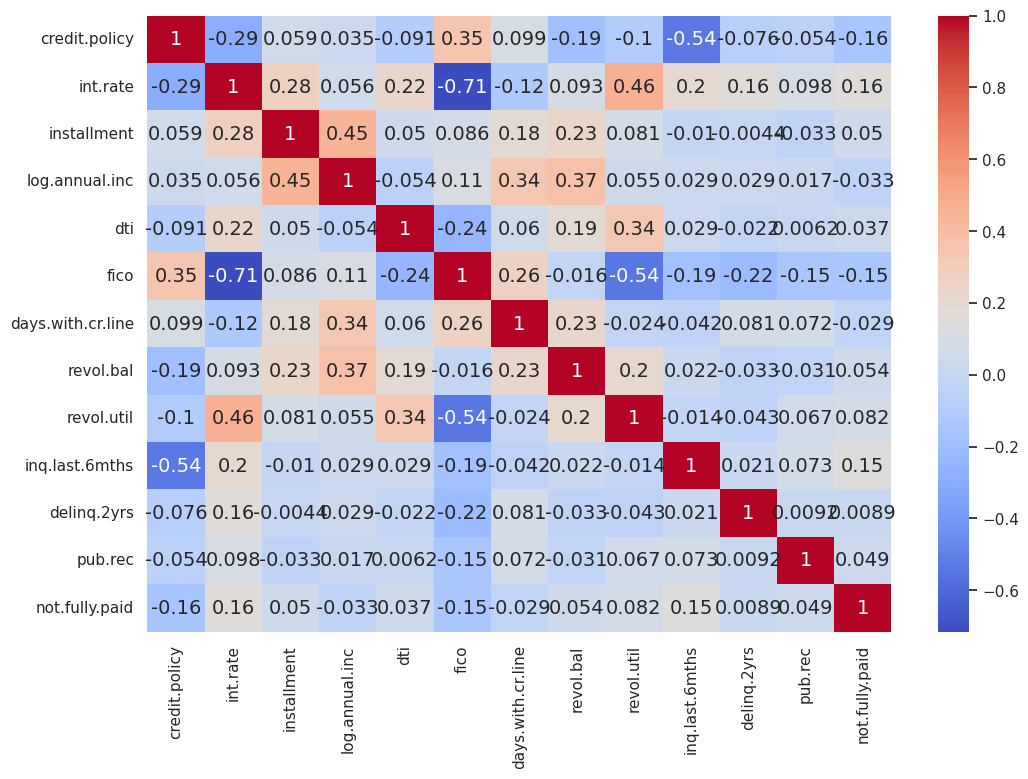

In [ ]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "coolwarm", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

## Model Building

### Feature engineering

In [ ]:
y = df['not.fully.paid']

cat_cols = ['purpose']
for col in cat_cols:
    groups = df.groupby(col)
    gini = 0
    for name, group in groups:
        prop_1 = group.loc[y == 1].mean(numeric_only=True)
        prop_0 = group.loc[y == 0].mean(numeric_only=True)
        gini += 1 - (prop_1 ** 2 + prop_0 ** 2)
    print(f"Gini impurity for {col}: {gini}")


Gini impurity for purpose: credit.policy       -9.371604e-01
int.rate             6.776852e+00
installment         -1.551798e+06
log.annual.inc      -1.663514e+03
dti                 -2.032505e+03
fico                -7.044118e+06
days.with.cr.line   -2.881727e+08
revol.bal           -5.456442e+09
revol.util          -2.833333e+04
inq.last.6mths      -5.467412e+01
delinq.2yrs          6.582267e+00
pub.rec              6.918952e+00
not.fully.paid       0.000000e+00
dtype: float64


In [ ]:
print(df['purpose'].value_counts())

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


In [ ]:
# Perform one-hot encoding on 'purpose' column
df = pd.get_dummies(df, columns=['purpose'], drop_first=False)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


### Finding Root Feature

In [ ]:
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, random_state=42)

# Fit the decision tree model to your data
clf.fit(X_train, y_train)

# Get the index of the feature used for splitting the root node
root_feature_index = clf.tree_.feature[0]

# Map the index to the corresponding feature name
root_feature_name = X_train.columns[root_feature_index]

print("Root feature used for splitting: ", root_feature_name)

Root feature used for splitting:  credit.policy


In [ ]:
# Get the value of the root node, which represents the number of samples of each class
root_node_value = clf.tree_.value[0]

# Extract the class labels and their corresponding counts
class_labels = clf.classes_
class_counts = root_node_value.ravel()

# Calculate the total number of samples at the root node
total_samples = class_counts.sum()

# Calculate the Gini impurity for each class
gini_impurity = 1 - sum((count/total_samples)**2 for count in class_counts)

print("Root node Gini impurity: ", gini_impurity)

Root node Gini impurity:  0.2691690512511753


In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7353862212943633


### Feature Importance

In [ ]:
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target

# Instantiate the DecisionTreeClassifier with the desired parameters
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Fit the decision tree model to your data
clf.fit(X, y)

# Get the feature importances (Gini impurities) from the trained decision tree
feature_importances = clf.feature_importances_

# Create a dictionary to store the Gini impurity for each feature
gini_dict = {}
for i, feature in enumerate(X.columns):  # Exclude the target variable from feature list
    gini_dict[feature] = feature_importances[i]

# Sort the dictionary by Gini impurity values in descending order
sorted_gini_dict = dict(sorted(gini_dict.items(), key=lambda item: item[1], reverse=False))

# Print the Gini impurity values for all features
for feature, gini in sorted_gini_dict.items():
    print("Feature: {}, Gini Impurity: {}".format(feature, gini))

# The feature with the highest Gini impurity would be selected as the root node by the decision tree algorithm
root_node = next(iter(sorted_gini_dict))
print("Root Node: {}".format(root_node))


Feature: purpose_credit_card, Gini Impurity: 0.005202474244229535
Feature: purpose_home_improvement, Gini Impurity: 0.007109957975185759
Feature: purpose_educational, Gini Impurity: 0.007187979242282058
Feature: purpose_major_purchase, Gini Impurity: 0.00762562390375511
Feature: purpose_small_business, Gini Impurity: 0.007983625199135556
Feature: purpose_all_other, Gini Impurity: 0.0111187498688077
Feature: pub.rec, Gini Impurity: 0.01187205527099229
Feature: purpose_debt_consolidation, Gini Impurity: 0.012082556608317172
Feature: delinq.2yrs, Gini Impurity: 0.013825879372001417
Feature: credit.policy, Gini Impurity: 0.0250016656960365
Feature: inq.last.6mths, Gini Impurity: 0.0359111668649498
Feature: fico, Gini Impurity: 0.061006734677809156
Feature: log.annual.inc, Gini Impurity: 0.10538397318214208
Feature: int.rate, Gini Impurity: 0.10767333453647578
Feature: days.with.cr.line, Gini Impurity: 0.11046965647615714
Feature: dti, Gini Impurity: 0.11329889222279169
Feature: revol.bal, 

### Simple Model using Gini Criterion

In [ ]:
# Create an instance of DecisionTreeClassifier with the selected root feature for splitting
clf = DecisionTreeClassifier(max_depth=None, random_state=42,
                             criterion='gini',
                             max_features=None)

# Fit the decision tree model to your data
clf.fit(X_train, y_train)

# Make predictions on train and test data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_train = clf.predict_proba(X_train)[:, 1]
y_prob_test = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy or other performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_report_train = classification_report(y_train, y_pred_train)
classification_report_test = classification_report(y_test, y_pred_test)
concordance_test = roc_auc_score(y_test, y_prob_test)
rank_ordering_test = y_prob_test.mean()

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)
print("Confusion matrix on train data: ", confusion_matrix_train)
print("Confusion matrix on test data: ", confusion_matrix_test)
print("Classification report on train data: ", classification_report_train)
print("Classification report on test data: ", classification_report_test)
print("Concordance test results: ", concordance_test)
print("Rank ordering test results: ", rank_ordering_test)


Accuracy on train data:  1.0
Accuracy on test data:  0.7353862212943633
Confusion matrix on train data:  [[6434    0]
 [   0 1228]]
Confusion matrix on test data:  [[1335  276]
 [ 231   74]]
Classification report on train data:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6434
           1       1.00      1.00      1.00      1228

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

Classification report on test data:                precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.21      0.24      0.23       305

    accuracy                           0.74      1916
   macro avg       0.53      0.54      0.53      1916
weighted avg       0.75      0.74      0.74      1916

Concordance test results:  0.5356503953353482
Rank ordering test results:  0.182

### Model 2 : Using grid SearchCV and SMOTE

Best criterion: entropy
Best max depth: 10
Accuracy on train data:  0.8641236793039154
Accuracy on test data:  0.8300186451211933
Confusion matrix on train data:  [[6040  391]
 [1358 5083]]
Confusion matrix on test data:  [[1437  177]
 [ 370 1234]]
Classification report on train data:                precision    recall  f1-score   support

           0       0.82      0.94      0.87      6431
           1       0.93      0.79      0.85      6441

    accuracy                           0.86     12872
   macro avg       0.87      0.86      0.86     12872
weighted avg       0.87      0.86      0.86     12872

Classification report on test data:                precision    recall  f1-score   support

           0       0.80      0.89      0.84      1614
           1       0.87      0.77      0.82      1604

    accuracy                           0.83      3218
   macro avg       0.83      0.83      0.83      3218
weighted avg       0.83      0.83      0.83      3218

Concordance test resul

<Axes: >

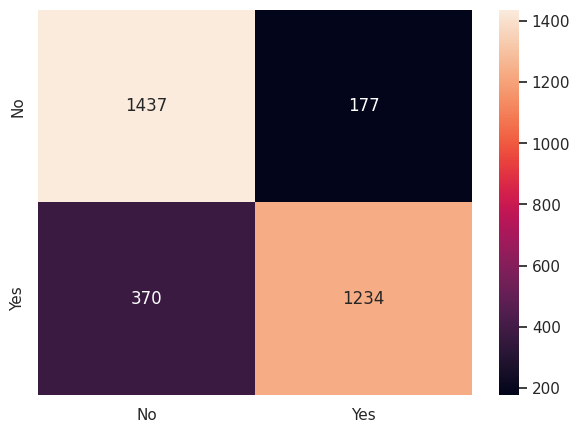

In [ ]:
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
}

# Create GridSearchCV object
grid_clf = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_clf.fit(X_train, y_train)

# Access the best estimator, criterion, and max_depth values
best_model = grid_clf.best_estimator_
best_criterion = best_model.get_params()['criterion']
best_max_depth = best_model.get_params()['max_depth']

# Print best criterion and max_depth values
print("Best criterion:", best_criterion)
print("Best max depth:", best_max_depth)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict test set labels
y_pred = best_model.predict(X_test)

# Make predictions on train and test data
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_prob_train = best_model.predict_proba(X_train)[:, 1]
y_prob_test = best_model.predict_proba(X_test)[:, 1]

# Calculate accuracy or other performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_report_train = classification_report(y_train, y_pred_train)
classification_report_test = classification_report(y_test, y_pred_test)
concordance_test = roc_auc_score(y_test, y_prob_test)
rank_ordering_test = y_prob_test.mean()

print("Accuracy on train data: ", accuracy_train)
print("Accuracy on test data: ", accuracy_test)
print("Confusion matrix on train data: ", confusion_matrix_train)
print("Confusion matrix on test data: ", confusion_matrix_test)
print("Classification report on train data: ", classification_report_train)
print("Classification report on test data: ", classification_report_test)
print("Concordance test results: ", concordance_test)
print("Rank ordering test results: ", rank_ordering_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

This confusion matrix shows us that the False Negative is lesser thus suggesting that this model is doing some good job in avoiding false negative and putting the company under risk with loan Defaulters

### A simple live demo of our model with a new data( for now used an existing data)

In [ ]:
# Assume we have a new data point called 'new_data' with the same feature columns as the original data
new_data = X_test.iloc[0, :]  # Example: using the first data point from the test set

# Predict class label for the new data point
new_data_label = best_model.predict([new_data])[0]

# Compute class probabilities for the new data point
new_data_probs = best_model.predict_proba([new_data])[0]

# Convert class probabilities to percentages
new_data_probs_percent = [f"{prob * 100:.2f}%" for prob in new_data_probs]

# Check if the predicted class label matches the true class label
if new_data_label == y_test.iloc[0]:
    prediction_result = "Correctly predicted"
else:
    prediction_result = "Incorrectly predicted"

print("New Data:")
print(new_data)
print("\nPredicted Class Label:", new_data_label)
print("Class Probabilities (No, Yes):", new_data_probs_percent)
print("Prediction Result:", prediction_result)


New Data:
credit.policy                    1.000000
int.rate                         0.122810
installment                     79.946293
log.annual.inc                  10.099085
dti                              4.216163
fico                           696.000000
days.with.cr.line             2883.490504
revol.bal                     1589.000000
revol.util                      23.326364
inq.last.6mths                   1.000000
delinq.2yrs                      0.000000
pub.rec                          0.000000
purpose_all_other                0.000000
purpose_credit_card              0.000000
purpose_debt_consolidation       0.000000
purpose_educational              0.000000
purpose_home_improvement         0.000000
purpose_major_purchase           0.000000
purpose_small_business           0.000000
Name: 11034, dtype: float64

Predicted Class Label: 1
Class Probabilities (No, Yes): ['0.00%', '100.00%']
Prediction Result: Correctly predicted


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Entropy Vs Gini at different Max depths

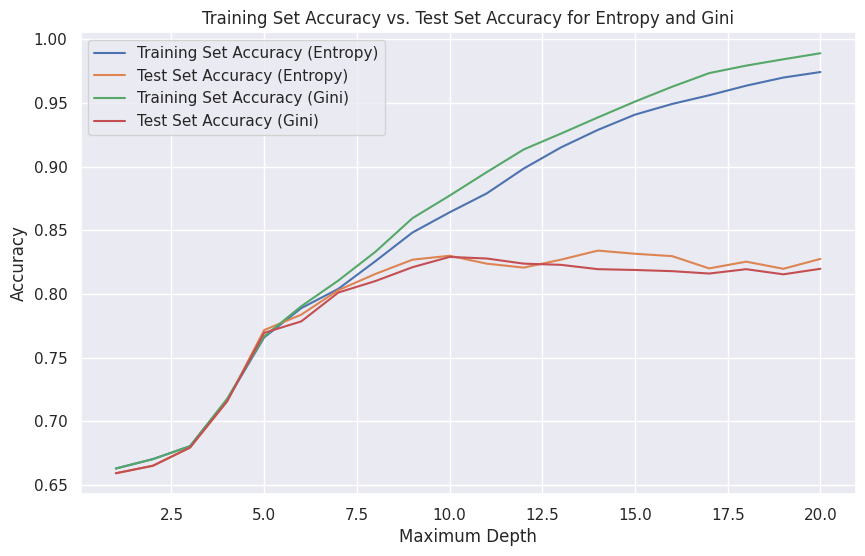

In [ ]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Define a range of maximum depths to try
max_depths = np.arange(1, 21)

# Initialize empty lists to store accuracy values for entropy and Gini
train_accuracy_entropy = []
test_accuracy_entropy = []
train_accuracy_gini = []
test_accuracy_gini = []

# Loop over the range of maximum depths
for max_depth in max_depths:
    # Train a decision tree model with entropy as the criterion
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    clf_entropy.fit(X_train, y_train)

    # Predict training set labels for entropy criterion
    y_train_pred_entropy = clf_entropy.predict(X_train)

    # Predict test set labels for entropy criterion
    y_test_pred_entropy = clf_entropy.predict(X_test)

    # Calculate accuracy on training set for entropy criterion
    train_acc_entropy = accuracy_score(y_train, y_train_pred_entropy)

    # Calculate accuracy on test set for entropy criterion
    test_acc_entropy = accuracy_score(y_test, y_test_pred_entropy)

    # Append accuracy values to the lists for entropy criterion
    train_accuracy_entropy.append(train_acc_entropy)
    test_accuracy_entropy.append(test_acc_entropy)

    # Train a decision tree model with Gini impurity as the criterion
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    clf_gini.fit(X_train, y_train)

    # Predict training set labels for Gini criterion
    y_train_pred_gini = clf_gini.predict(X_train)

    # Predict test set labels for Gini criterion
    y_test_pred_gini = clf_gini.predict(X_test)

    # Calculate accuracy on training set for Gini criterion
    train_acc_gini = accuracy_score(y_train, y_train_pred_gini)

    # Calculate accuracy on test set for Gini criterion
    test_acc_gini = accuracy_score(y_test, y_test_pred_gini)

    # Append accuracy values to the lists for Gini criterion
    train_accuracy_gini.append(train_acc_gini)
    test_accuracy_gini.append(test_acc_gini)

# Plot the training set accuracy and test set accuracy as a function of maximum depth for entropy and Gini
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracy_entropy, label='Training Set Accuracy (Entropy)')
plt.plot(max_depths, test_accuracy_entropy, label='Test Set Accuracy (Entropy)')
plt.plot(max_depths, train_accuracy_gini, label='Training Set Accuracy (Gini)')
plt.plot(max_depths, test_accuracy_gini, label='Test Set Accuracy (Gini)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Training Set Accuracy vs. Test Set Accuracy for Entropy and Gini')
plt.legend()
plt.show()


This clarifies why the searchCV method chose max_depth=10 and entropy criteria to get higher performance.

Cross-Validation Scores: [0.83170254 0.82452707 0.81592689 0.81657963 0.81527415]


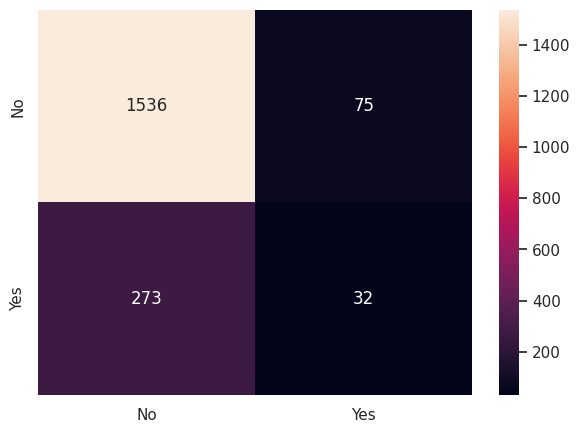

In [ ]:
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a decision tree classifier on the training set
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predicting on the testing set
y_pred = clf.predict(X_test)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

from sklearn.model_selection import cross_val_score

# Performing k-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)

### SUMMARY

1. Sampling: SMOTE (Synthetic Minority Over-sampling Technique) was used to balance the data. SMOTE is a technique used to oversample the minority class by generating synthetic examples of the minority class to address class imbalance.

2. Feature Engineering: One-hot encoding was used to encode the categorical column in the DataFrame. One-hot encoding is a technique used to convert categorical variables into binary (0 or 1) values to be used as input features for machine learning algorithms.

3. Performance comparison between Train and Test: The accuracy score was calculated to compare the performance of the model on the train and test datasets and we got a test accuracy score of 0.83 with a very fewer percentage of false Negative which is imminent in a Loan Default Prediction problem



4. Use of Cross-validation: GridSearchCV was used for cross-validation, which automatically performs cross-validation during the hyperparameter tuning process which gave the following scores

Cross-Validation Scores: [0.83170254 0.82452707 0.81592689 0.81657963 0.81527415]

Confusion matrix on test data:  [[1437  177]
 [ 370 1234]]
Classification report on train data:                
    precision    recall  f1-score   support

           0       0.82      0.94      0.87      6431
           1       0.93      0.79      0.85      6441

    accuracy                           0.86     12872
   macro avg       0.87      0.86      0.86     12872
weighted avg       0.87      0.86      0.86     12872

Classification report on test data:                
    precision    recall  f1-score   support

           0       0.80      0.89      0.84      1614
           1       0.87      0.77      0.82      1604

    accuracy                           0.83      3218
   macro avg       0.83      0.83      0.83      3218
weighted avg       0.83      0.83      0.83      3218

Concordance test results:  0.8892037641336559
Rank ordering test results:  0.5118824326441307


### A note to the client
*some general guidelines for the steps that the client/end-user may need to follow to deploy the model obtained from the previous steps:*

1. **Technical/Infrastructure Requirements:** The client needs to have a suitable environment with the required dependencies installed, including Python with the necessary libraries (e.g., scikit-learn, pandas, etc.), and any other specific requirements such as GPU for faster inference, if applicable.

2. **Files to be Provided:** The client needs to be provided with the trained model file, which includes the serialized model object (e.g., the 'best_model' object in the previous steps) and any other required files or data, such as feature encoding mappings or data dictionaries, if applicable.

3. **Data Cleaning and Preprocessing:** The client needs to perform the same data cleaning and preprocessing steps on the new data as done during the training process. This may include handling missing values, applying feature encoding (e.g., one-hot encoding for categorical features), and scaling/normalizing the numerical features, if required.

4. **Using the Model on New Data:** The client can use the trained model to predict the class labels or probabilities for new data points by passing the new data through the trained model. This involves applying the same preprocessing steps (if any) on the new data as done during the training process, and then using the 'predict()' or 'predict_proba()' functions of the trained model to obtain the predictions or probabilities, respectively.

5. **Model Performance Evaluation:** The client can evaluate the performance of the model on new data points using various performance metrics such as accuracy, precision, recall, F1-score, etc., by comparing the predicted labels or probabilities with the actual labels of the new data. This can help the client assess the model's performance on unseen data and identify any potential issues or areas for improvement.

It's important for the client to thoroughly test and validate the model's performance on new data before deploying it in a production environment. Regular monitoring and evaluation of the model's performance on new data points can also help in identifying any drift or degradation in model performance over time and take necessary actions for model maintenance and improvement.
